In [2]:
import pandas as pd
import yfinance as yf
import numpy as np

In [3]:
START = "2018-01-01"
END = "2023-02-01"
SYMBOL = ["TSLA", "KRW=X", "AAPL", "META", "GOOG", "^GSPC", "GLD"]

df = yf.download(SYMBOL, start=START, end=END, period='1d', interval='1d', ignore_tz=True)

[*********************100%***********************]  7 of 7 completed


In [4]:
data = df['Open']
data_open = data.copy()
data.pct_change().round(3).head()

,AAPL,GLD,GOOG,KRW=X,META,TSLA,^GSPC
Date,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,-0.001,NaN,NaN,NaN
2018-01-03,0.014,0.003,0.015,-0.003,0.024,0.029,0.005
2018-01-04,0.000,-0.001,0.022,0.003,0.017,-0.025,0.008
2018-01-05,0.005,0.000,0.006,-0.002,0.004,0.012,0.004


<AxesSubplot: xlabel='Date'>

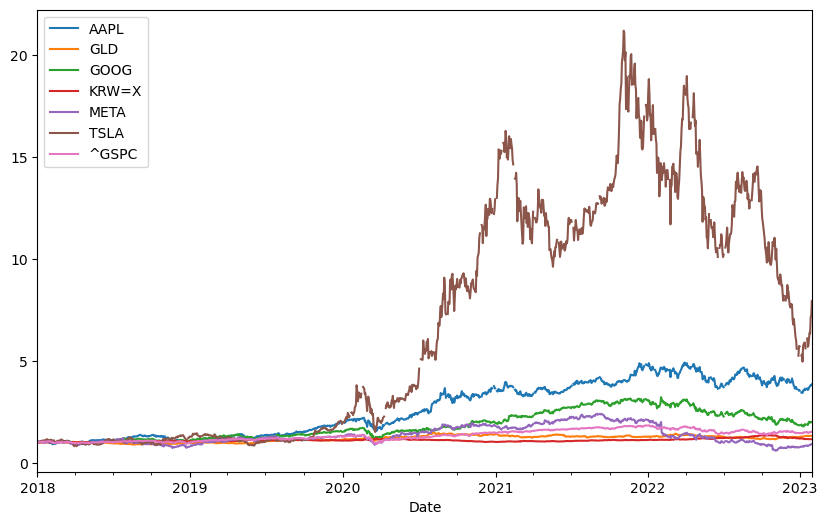

In [5]:
rets = np.log(data / data.shift(1))
rets.round(3).head()
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

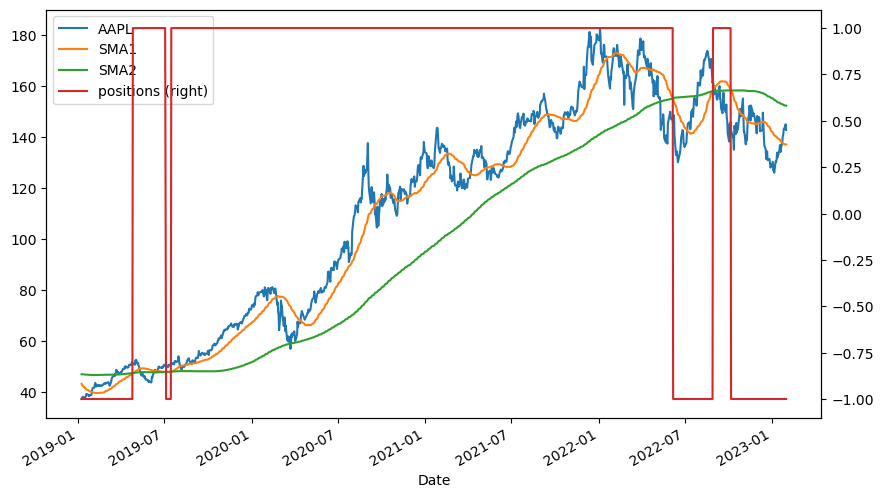

In [6]:
sym = "AAPL"
data_open.dropna(inplace=True)
data_open['SMA1'] = data_open[sym].rolling(window=42).mean()
data_open['SMA2'] = data_open[sym].rolling(window=256).mean()

data_open.dropna(inplace=True)
data_open['positions'] = np.where(data_open['SMA1'] > data_open['SMA2'], 1, -1)
ax = data_open[['AAPL', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6), secondary_y='positions')

In [7]:
data_open.head()

,AAPL,GLD,GOOG,KRW=X,META,TSLA,^GSPC,SMA1,SMA2,positions
Date,,,,,,,,,,
2019-01-08,37.389999,121.150002,53.805500,1116.380005,139.889999,22.797333,2568.110107,43.313036,47.078740,-1
2019-01-09,37.822498,121.449997,54.082500,1121.630005,142.949997,22.366667,2580.000000,43.011666,47.060313,-1
2019-01-10,38.125000,121.980003,53.382999,1117.479980,143.080002,22.293333,2573.510010,42.693393,47.040752,-1
2019-01-11,38.220001,121.739998,53.159000,1117.280029,143.149994,22.806000,2588.110107,42.353512,47.021553,-1
2019-01-14,37.712502,122.150002,52.346001,1118.329956,142.000000,22.825333,2580.310059,42.027916,46.999492,-1


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

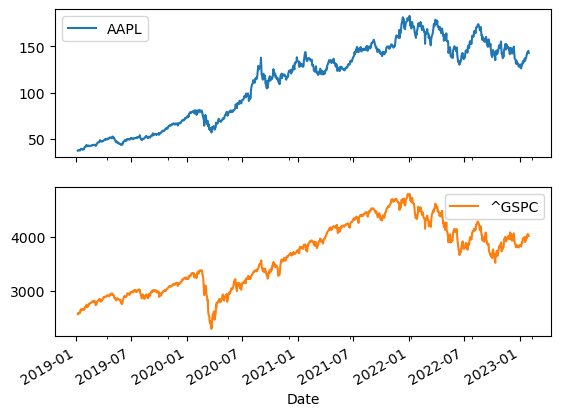

In [8]:
data_open[["AAPL", "^GSPC"]].plot(subplots=True)

<AxesSubplot: xlabel='Date'>

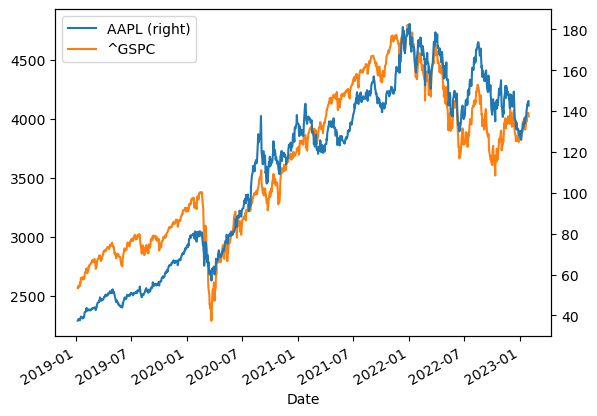

In [9]:
data_open[["AAPL", "^GSPC"]].plot(secondary_y="AAPL")

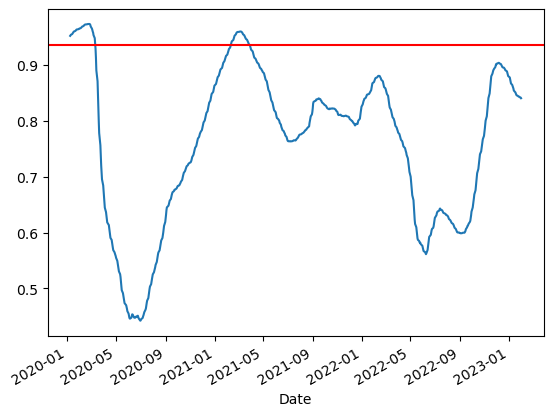

In [27]:
total_corr = data_open[['AAPL', '^GSPC']].corr()
ax = data_open['AAPL'].rolling(window=252).corr(data_open['^GSPC']).plot()
ax.axhline(total_corr.iloc[0, 1], c='r')

In [12]:
data_open['AAPL'].rolling(window=252).corr(data_open['^GSPC'])

Date
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-14         NaN
                ...   
2023-01-25    0.843393
2023-01-26    0.843239
2023-01-27    0.842189
2023-01-30    0.841520
2023-01-31    0.840281
Length: 1023, dtype: float64